In [2]:
#Loads modules
import torch as t
import matplotlib.pyplot as plt

import os

import sys
dir_path = os.path.dirname(os.getcwd())
sys.path.append(dir_path + '\\scripts')

import json

import importlib
import Systems as Systems
import Plotting as Plotting
import Training as Training
import Controls as Controls

In [3]:
experiment = "Flensmon1D_0"

In [4]:
#Loads the params_dict for the experiment
exp_path = os.path.join(dir_path,"Experiments",experiment)

params_filepath = os.path.join(exp_path,"Parameters.json")
with open(params_filepath) as json_file:
    params_dict = json.load(json_file)

Right now the dimensions of the derivatives are not correct.


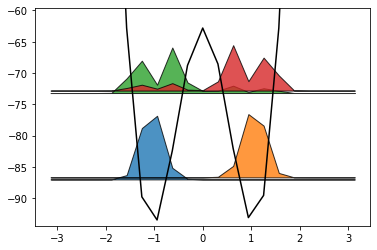

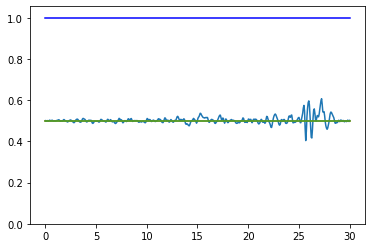

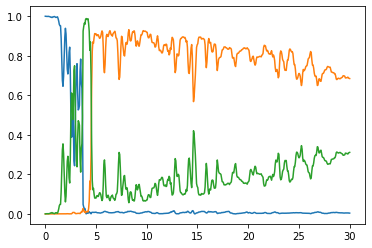

In [5]:
importlib.reload(Systems)
importlib.reload(Plotting)
importlib.reload(Training)
importlib.reload(Controls)

class Flensmon_1D(t.nn.Module, Systems.Periodic_System, Controls.FreePulse, Training.Trainer, Plotting.Plotter):
    def __init__(self,params_dict):
        super().__init__()
        self.params_dict = params_dict
        self.tmp = t.nn.parameter.Parameter(t.tensor(1.))
        super(t.nn.Module,self).__init__()
        return
    
    def forward(self):
        H = self.get_H(self.activation_func(self.times).flip(0),self.get_control().flip(0))
        self.latest_matrix_exp = t.matrix_exp(-1j*H*self.dt)
        return t.linalg.multi_dot(list(mat for mat in self.latest_matrix_exp))

    def prepare_KinE(self):
        self.KinE = 4*self.params_dict['EC']*self.q_mat**2
        self.EJ = self.params_dict['EJ']

    def V(self, alphas, control):
        return self.EJ*(-self.cos_mat.repeat((alphas.shape[0],1,1)) \
                            + alphas.view(-1,1,1)/2*self.cos2_mat \
                            + control.flip(0).view(-1,1,1)*self.q_mat)

obj = Flensmon_1D(params_dict)
obj.plot_potential()
obj.plot_activation_func()
obj.plot_occupancy()

In [45]:
obj.minimize(0.01,2000)

initial loss: 0.21262507622148713
Ended at step: 4006, with loss: 0.3014911689754297 and runtime: 1381.9444735050201


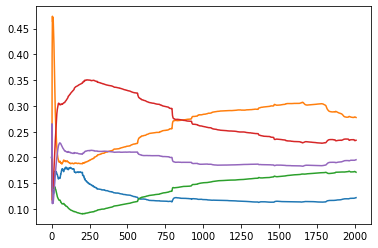

In [42]:
plt.plot(obj.stored_weights.T)

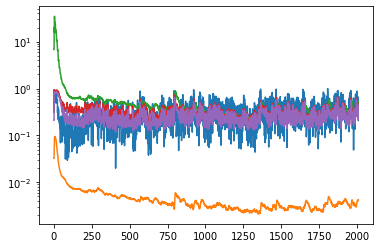

In [43]:
plt.plot(obj.stored_losses.T)
plt.yscale('log')

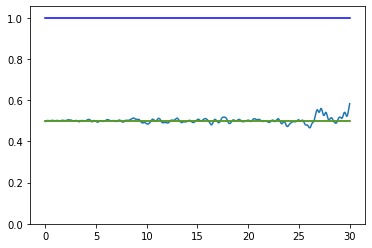

In [14]:
obj.plot_activation_func()

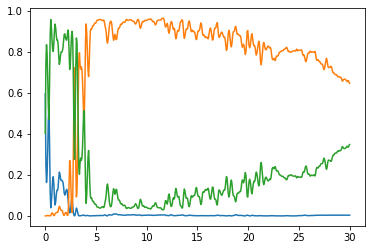

In [15]:
obj.plot_occupancy()

In [31]:
from scipy.signal import medfilt
medfilt(obj.stored_losses.numpy(),51)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

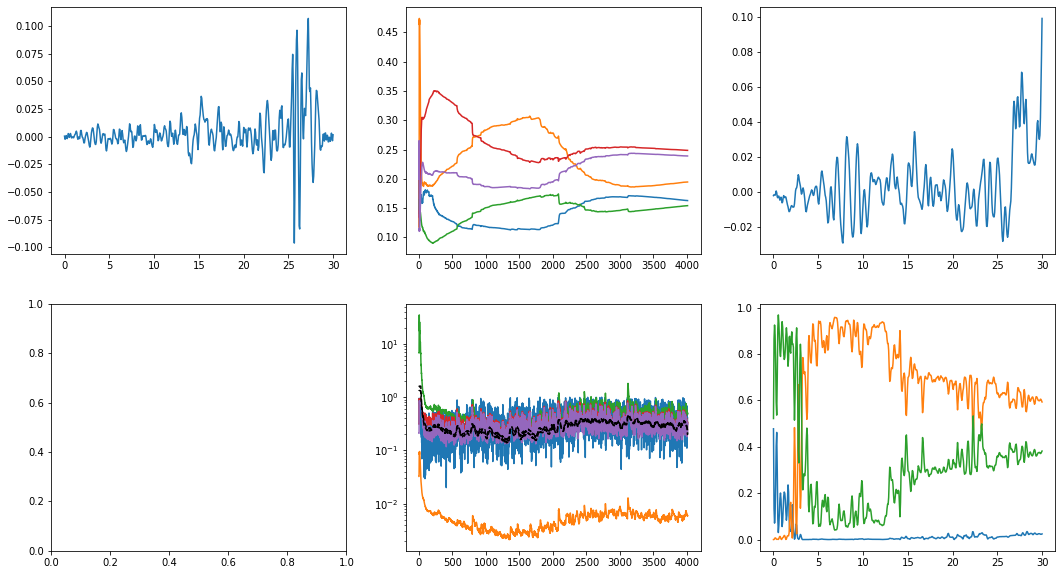

In [46]:
def plot_run(self=obj):
    from scipy.signal import medfilt
    fig, ax = plt.subplots(figsize=(18,10),ncols=3,nrows=2)
    ax[0,0].plot(self.times, self.init_pulse())
    

    ax[0,1].plot(self.stored_weights.T)
    ax[1,1].plot(self.stored_losses.T)
    ax[1,1].plot(medfilt(self.stored_losses.mean(0),51),'k--')
    ax[1,1].plot(medfilt((self.stored_losses*self.stored_weights).sum(0),51),'k--')
    ax[1,1].set_yscale('log')

    ax[0,2].plot(self.times, self.get_control().detach())
    ax[1,2].plot(self.times, self.get_occupancy().detach().T)
plot_run()

In [87]:
obj.pulse

Parameter containing:
tensor([ 4.1660e-04, -2.4065e-03, -1.5939e-03,  9.2546e-04,  1.3162e-04,
        -1.8205e-03, -1.6280e-04,  2.7743e-03,  1.7387e-03, -6.9497e-04,
         4.3951e-04,  2.8324e-03,  1.2600e-03, -1.1482e-03, -9.8995e-04,
        -1.5482e-04, -8.1502e-04, -1.0501e-03,  2.9334e-04,  1.5840e-03,
         2.2249e-03,  3.5546e-03,  4.9430e-03,  3.4209e-03, -8.9537e-04,
        -2.4358e-03, -4.0107e-04, -3.4498e-04, -1.8031e-03,  9.4654e-04,
         5.5067e-03,  5.5429e-03,  2.0506e-03, -4.2348e-04, -1.0100e-03,
        -2.8407e-03, -5.6696e-03, -5.6136e-03, -2.1391e-03,  4.0869e-04,
         2.0274e-03,  3.8396e-03,  3.3357e-03,  8.6723e-04, -1.6108e-03,
        -4.5333e-03, -7.9088e-03, -9.5082e-03, -7.1917e-03, -1.7542e-03,
         3.2780e-03,  6.0944e-03,  7.9030e-03,  7.4403e-03,  4.0438e-03,
        -6.9613e-04, -4.7044e-03, -6.8058e-03, -7.1500e-03, -4.6963e-03,
         1.8001e-03,  8.6257e-03,  1.1450e-02,  9.9057e-03,  7.9144e-03,
         6.4559e-03,  1.8643e